## Main and supplementary figures

## Figure 7, S4, S5: Heatmaps of seasonality ratio of annual/semiannual oscillations and climate variables


### Estupinan-Suarez, et al. (2021). A Regional Earth System Data Lab for Understanding Ecosystem Dynamics: An Example from Tropical South America. Front. Earth Sci. 9:613395. doi: 10.3389/feart.2021.613395
#### Correspondence to: lestup@bgc-jena.mpg.de, linamaesu@gmail.com
#### GitHub repository: https://github.com/linamaes/Regional_ESDL

This script does the following:
- Loads cubes with seasonality ratio (annual/semiannual oscillation), biotic units map, land cover data by biotic units, and climate variables (precipitation of the driest month, maximum temperature of the warmest month, median annual cloud frecuency)
- Select climate data by biotic units
- Plot heatmaps of climate variables versus seasonality ratio

About the notebook:
- It is written in Julia 1.3
- "#" comments in the code are intended to explain specific aspects of the coding
- New steps in workflows are introduced with bold headers

April 2021, Max Planck Institute for Biogeochemistry, Jena, Germany

In [1]:
using OnlineStats

In [2]:
using ESDL

In [3]:
using ESDLPlots

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-17573836717556478169\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-9489080042360132062\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-17573836717556478169\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [4]:
using Plots

In [5]:
using NetCDF

In [6]:
using DelimitedFiles

In [68]:
gr(size=(400,350)) # gr(size=(600,400)) #
default(fmt = :png)

## Load data

In [8]:
# Location RegESDL
pathin1 = "/my_pathin1/.../"

#Location land cover data by biotic units
pathin2 = "/my_pathin2/.../"

# Location Biotic units map in NetCDF format
pathin3 = "/my_pathin3/.../"

"/my_pathin3/.../"

In [10]:
lat = (4,6)
lon = (-73,-71)

(-73, -71)

In [11]:
time = (2001:2015)

2001:2015

In [12]:
c = Cube(string(pathin1,"/Cube_2019highColombiaCube_184x120x120.zarr/"))

Collection of ZArray Cube with the following dimensions
Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665
Lat                 Axis with 3360 Elements from 13.99613735 to -13.995417350000002
Time                Axis with 782 Elements from 2001-01-05T00:00:00 to 2017-12-31T00:00:00
Variable            Axis with 92 elements: S_Silt TemperatureSeasonality .. MODCF_monthlymean_06 burn_date 
Total size: 3.03 TB


In [13]:
# foreach(println,caxes(c)[4].values)

In [14]:
# Percentage of land cover by biotic untis
lcbybuin = readdlm(string(pathin2,"dimred/dataout/lc2014bybupercentage.csv"), ',')
lcbybu = map(x->x=="missing" ? missing : x, lcbybuin)
lcbybu2 = lcbybu[3:end,:];

In [15]:
dictlc2 = include("lc_legend_abr2.jl");

## Defining mask from vegetation variables

In [16]:
cmask = c[variable="fapar", Time=Date(2001,1,5)]

ZArray Cube with the following dimensions
Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665
Lat                 Axis with 3360 Elements from 13.99613735 to -13.995417350000002
Total size: 44.22 MB


In [17]:
mask1 = map(x->ismissing(x) ? missing : 1, cmask)

Transformed cube ZArray Cube with the following dimensions
Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665
Lat                 Axis with 3360 Elements from 13.99613735 to -13.995417350000002
Total size: 44.22 MB


## Load biotic units from NetCDF

In [18]:
layer = ncread(string(pathin3,"/UB_IAvH_wgs84.nc"), "layer");

In [19]:
cbu = CubeMem(CubeAxis[getAxis("Lon", c),getAxis("Lat", c)], layer)
cbu.properties["labels"]=include("bioticunits_name_notilde.jl");

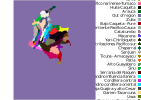

In [20]:
plotMAP(cbu, dmin=0, dmax=70)

In [21]:
bunames = include("bioticunits_name_notilde.jl")
i = 1
bunames[i]

"Alta Guajira"

## Load variables

### Precipitation of the driest month

In [22]:
# This is a descriptive variable. It only has data on the first time-step
cppt = c[variable="PrecipitationofDriestMonth", Time=Date(2001,1,5)]

ZArray Cube with the following dimensions
Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665
Lat                 Axis with 3360 Elements from 13.99613735 to -13.995417350000002
Total size: 44.22 MB


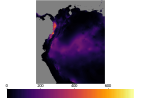

In [23]:
plotMAP(cppt)

### Maximum temperature of the warmest month

In [24]:
ctem = c[variable="MaxTemperatureofWarmestMonth", Time=Date(2001,1,5)]

ZArray Cube with the following dimensions
Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665
Lat                 Axis with 3360 Elements from 13.99613735 to -13.995417350000002
Total size: 44.22 MB


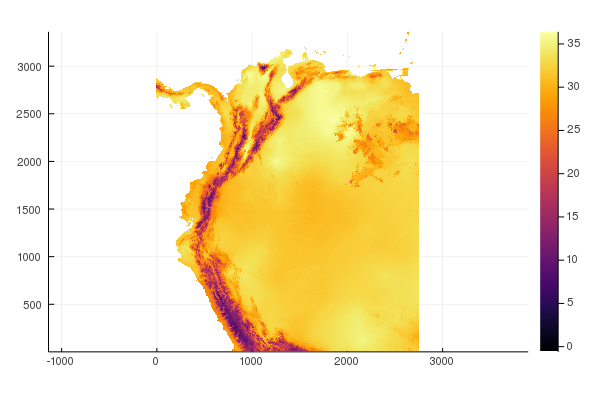

In [25]:
heatmap(ctem[:,:]'[end:-1:1,:], aspect_ratio = :equal)

### Mean monthly clouds data

In [26]:
ccloud = c[variable=["MODCF_monthlymean_01","MODCF_monthlymean_02","MODCF_monthlymean_03",
        "MODCF_monthlymean_04","MODCF_monthlymean_05","MODCF_monthlymean_06",
        "MODCF_monthlymean_07","MODCF_monthlymean_08","MODCF_monthlymean_09",
        "MODCF_monthlymean_11","MODCF_monthlymean_10","MODCF_monthlymean_12"], 
    Time=Date(2001,1,5)]#, Time=Date(2001,1,5)]

Collection of ZArray Cube with the following dimensions
Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665
Lat                 Axis with 3360 Elements from 13.99613735 to -13.995417350000002
Variable            Axis with 12 elements: MODCF_monthlymean_01 MODCF_monthlymean_02 .. MODCF_monthlymean_10 MODCF_monthlymean_12 
Total size: 530.64 MB


In [27]:
# Calculate annual median of clouds coverage
medianax = CategoricalAxis("Median", ["percentage"])
indims = InDims("Variable")
outdims = OutDims(medianax)

OutDims((ESDL.Cubes.Axes.ByValue(Median              Axis with 1 elements: percentage ),), (), zero, identity, :auto, false, AsArray(), :input, Zarr.NoCompressor(), "", false, 1)

In [28]:
function medianFx(xout, xin)
    #@show size(xin)#, size(xin)
    sort!(xin)
    xout .= (xin[6]+xin[7])/200 # coefficient 2  * 100 to get %
end

medianFx (generic function with 1 method)

In [29]:
ccloudmd = mapCube(medianFx, ccloud, indims=indims, outdims=outdims)

Progress: 100%|█████████████████████████████████████████| Time: 0:01:16


In-Memory data cube with the following dimensions
Median              Axis with 1 elements: percentage 
Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665
Lat                 Axis with 3360 Elements from 13.99613735 to -13.995417350000002
Total size: 44.22 MB


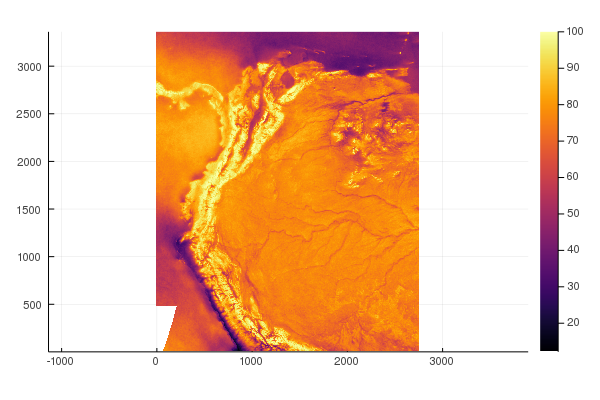

In [30]:
# Plot data
heatmap(ccloudmd[1,:,:]'[end:-1:1,:], aspect_ratio = :equal)

### Load seasonality ratio

In [31]:
mask1

Transformed cube ZArray Cube with the following dimensions
Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665
Lat                 Axis with 3360 Elements from 13.99613735 to -13.995417350000002
Total size: 44.22 MB


In [32]:
ratin = readdlm(string(pathin2, "/monobimodal/dataout/ratio_annual_semiannual_maskosc234.csv"),',')
ratmis = map(x->isnan(x) ? missing : x, ratin' |> Array)
rat1 = CubeMem(CubeAxis[getAxis("Lon", c),getAxis("Lat", c)], ratmis)

In-Memory data cube with the following dimensions
Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665
Lat                 Axis with 3360 Elements from 13.99613735 to -13.995417350000002
Total size: 79.6 MB


In [33]:
# rat1 = loadCube("ratio_annual_semiannual_pca1kmstd2014")

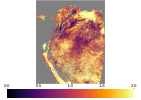

In [34]:
plotMAP(rat1, dmin=0, dmax=2)

## Find pixels where variables and the seasonlity ratio map match spatially

In [35]:
# Define a mask for vegetation variables, ratio map, and climate variable
function maskvarratioFx(mask1, rat1, cin)
    maskall = map((x,y,z)->x*y*z, mask1, rat1, cin)
    mask2 = map(x->ismissing(x) ? missing : 1, maskall[:,:]);
end

maskvarratioFx (generic function with 1 method)

In [36]:
# Apply mask to ratio map based on the assessed variable
mask2ppt = maskvarratioFx(mask1, rat1, cppt)
mask2tem = maskvarratioFx(mask1, rat1, ctem)
mask2cloud = maskvarratioFx(mask1, rat1, ccloudmd[Median="percentage"]);

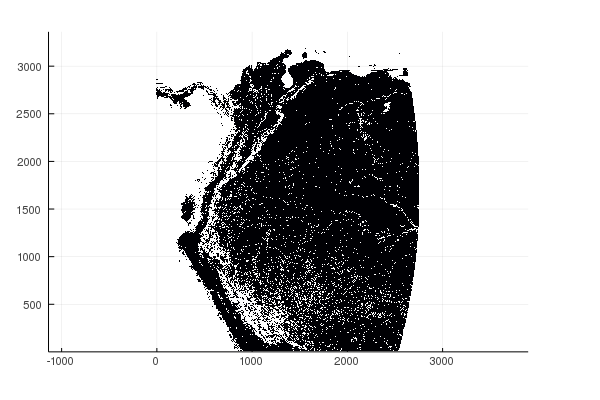

GKS: Possible loss of precision in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range


In [37]:
heatmap(mask2ppt[:,:]'[end:-1:1,:], aspect_ratio = :equal)

In [38]:
indims = InDims("Lon","Lat")
outdims = OutDims("Lon","Lat")

OutDims((ESDL.Cubes.Axes.ByName("Lon"), ESDL.Cubes.Axes.ByName("Lat")), (), zero, identity, :auto, false, AsArray(), :input, Zarr.NoCompressor(), "", false, 1)

In [39]:
function maskout(xout, xin, mask)
    xout[:] = xin.*mask
end

maskout (generic function with 1 method)

In [40]:
# Exclude pixels from the ratio map that do not match the assessed variable using the respective mask
# ratm = mapCube(maskout, rat1, mask2, indims=indims, outdims=outdims)

ratmppt = mapCube(maskout, rat1, mask2ppt, indims=indims, outdims=outdims)
ratmtem = mapCube(maskout, rat1, mask2tem, indims=indims, outdims=outdims)
ratmclouds = mapCube(maskout, rat1, mask2cloud, indims=indims, outdims=outdims)

In-Memory data cube with the following dimensions
Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665
Lat                 Axis with 3360 Elements from 13.99613735 to -13.995417350000002
Total size: 79.6 MB


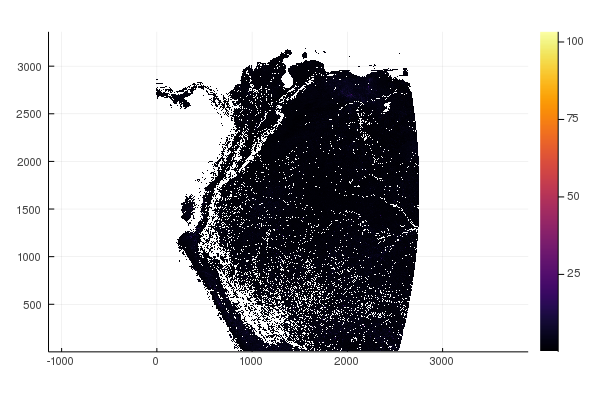

In [41]:
heatmap(ratmppt[:,:]'[end:-1:1,:], aspect_ratio = :equal)

In [42]:
# Exclude pixels from the assessed variable that do not match the ratio map
# varm = mapCube(maskout, cvar, mask2, indims=indims, outdims=outdims)

varmppt = mapCube(maskout, cppt, mask2ppt, indims=indims, outdims=outdims)
varmtem = mapCube(maskout, ctem, mask2tem, indims=indims, outdims=outdims)
varmcloud = mapCube(maskout, ccloudmd, mask2cloud, indims=indims, outdims=outdims)

In-Memory data cube with the following dimensions
Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665
Lat                 Axis with 3360 Elements from 13.99613735 to -13.995417350000002
Median              Axis with 1 elements: percentage 
Total size: 44.22 MB


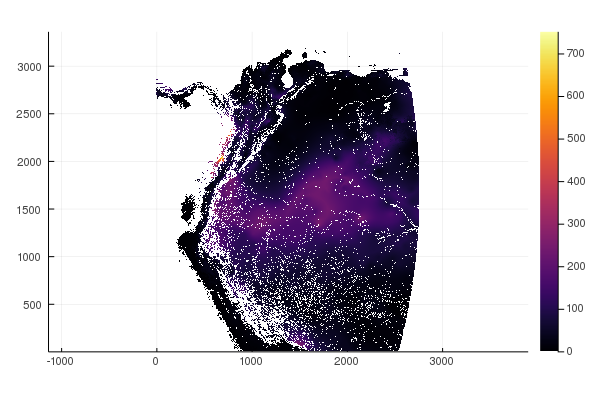

In [43]:
heatmap(varmppt[:,:]'[end:-1:1,:], aspect_ratio = :equal)

## Select data by biotic unit

In [44]:
cbu

In-Memory data cube with the following dimensions
Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665
Lat                 Axis with 3360 Elements from 13.99613735 to -13.995417350000002
labels: Dict(30.0 => "Bita",47.0 => "Huila-Caqueta",54.0 => "Serrania del Naquen",32.0 => "Altoandino influencia llanera",50.0 => "Picachos",2.0 => "Estribacion norte Sierra Nevada de Santa Marta",40.0 => "Cordillera central",11.0 => "Sinu",39.0 => "Casanare",46.0 => "Villavicencio"…)
Total size: 44.22 MB


In [45]:
i = 27
m1 = map(x -> x==i ? 1.0 : 0.0, cbu)

Transformed cube In-Memory data cube with the following dimensions
Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665
Lat                 Axis with 3360 Elements from 13.99613735 to -13.995417350000002
Total size: 44.22 MB


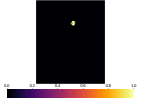

In [46]:
plotMAP(m1)

## Plot one heatmap

In [47]:
idx = findall(x-> x==i, cbu[:,:])
cbuin = cbu[:,:]
validx = (map(x->cbuin[x], idx));

In [48]:
rat1d = ratmppt[:,:];

In [49]:
varin = varmppt[:,:];
varname = "Precipitation driest month (mm)"

"Precipitation driest month (mm)"

In [50]:
# Number of pixels for selected biotic unit
size(collect(skipmissing(map(x->rat1d[x], idx))))

(20560,)

In [51]:
ratvaridx = hcat((collect(skipmissing(map(x->rat1d[x], idx)))), (collect(skipmissing(map(x->varin[x], idx)))))
#collect(skipmissing(ratidx))
ratvaridx[:,1] = map(x-> x>2 ? 2 : x, ratvaridx[:,1]);

In [52]:
titleout = size(ratvaridx)[1]

20560

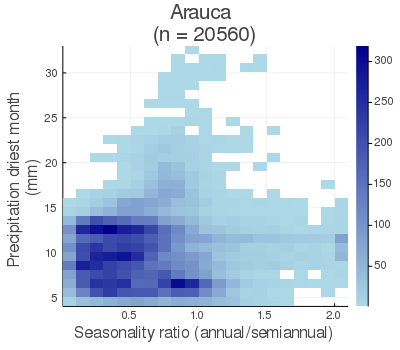

In [69]:
histogram2d(ratvaridx[:,1], ratvaridx[:,2], title = string(bunames[i], " \n(n = ", size(ratvaridx)[1] , ")"),
    yaxis=(varname), xaxis=("Seasonality ratio (annual/semiannual)"), c=:blues)

## Loop for plotting heatmaps with land cover as title

In [82]:
function plothmbu(bunames, cbu, rat1d, varin, varname, pathout, yst, yend)

    # From 1 until the length of biotic units names
    for i = 1:66 

        titlen = bunames[i]
        
        # Find the two most dominant land cover clases for the selected biotic unit
        lcall = findall(row->row==i, lcbybu2[:,1])
        lcsub = hcat(lcbybu2[lcall,2:end]' |> Matrix, lcbybu[1,2:end])
        lcmis = sortslices(lcsub, dims=1, rev=true)
        idmis = findmax(findall(x->ismissing(x), lcmis[:,1]))[1]
        lcmax = lcmis[idmis+1:end,:]
        
        # Set figure title based on dominant land covers
        titlex = string(dictlc2[lcmax[1,2]], " (", round(lcmax[1,1], digits=2), "%) + 
",dictlc2[lcmax[2,2]], " (", round(lcmax[2,1], digits=2), "%)")

        # Select pixels of interest bases on the selected biotic unit  
        idx = findall(x-> x==i, cbu[:,:])
        ratvaridx = hcat((collect(skipmissing(map(x->rat1d[x], idx)))), 
            (collect(skipmissing(map(x->varin[x], idx)))))
        
        if minimum(ratvaridx[:,2]) < 0
            @show i
        end
        
    # Plot commands
        pout = histogram2d(ratvaridx[:,1], ratvaridx[:,2], 
            titlefontsize = 13, title = string(titlex, "  (n=", size(ratvaridx)[1] , ")"), 
            xlim =(0, 3), xaxis=("Seasonality ratio (annual/semiannual)"),  xtickfont=font(11), 
            yaxis=(varname), ytickfont=font(12, "TimesNewRoman"), 
#              ylim = (yst, yend), #activate for equal axis range e.g. temperature and clouds
            xguidefont=font(15, "TimesNewRoman"), yguidefont=15,
            dpi=200)
   
        # Save figure
        nameout2 = join(map(x -> isspace(titlen[x]) ? "" : titlen[x], 1:length(titlen)))
        savefig(pout, string(pathout, "heatmap_bu_", i, "_", nameout2, ".png"))
        
    end
    
end

plothmbu (generic function with 1 method)

## Figure 8 - Precipitation of the driest month

In [86]:
# Variable name for the y-axis label
varname = "Precip. driest month (mm)"

# Location for saving figures
locfol = "minpremonth/axisdiffer/"
pathout = string(pathin2, "dimred/plots/heatmaps/mask/2014/", locfol);

In [87]:
varname

"Precip. driest month (mm)"

In [88]:
plothmbu(bunames, cbu, ratmppt[:,:], varmppt[:,:], varname, pathout, 0, 800)

## Figure S4 - Maximum temperature of the warmest month

In [77]:
# Variable name for the y-axis label
varname = "Max. °T warmest month (°C)"

# Location for saving figures
locfol = "maxtemwarmestmon/axisequal/original/"
pathout = string(pathin2, "dimred/plots/heatmaps/mask/2014/", locfol);

In [78]:
plothmbu(bunames, cbu, ratmtem[:,:], varmtem[:,:], varname, pathout, 0, 35)

## Figure S5 - Median annual cloud frecuency

In [79]:
# Variable name for the y-axis label
varname = "Median cloud frecuency (%)"

# Location for saving figures
locfol = "clouddays/median/axisequal/original/"  
pathout = string(pathin2, "dimred/plots/heatmaps/mask/2014/", locfol);

In [80]:
plothmbu(bunames, cbu, ratmclouds[:,:], varmcloud[:,:,1], varname, pathout, 40, 100)